In [32]:
import librosa
import tensorflow as tf
print(tf.__version__)
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
import sys
from IPython.display import Audio
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
import IPython.display as ipd

2.2.0


In [33]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
os.getcwd()

'/content'

In [0]:
filepath = "/content/gdrive/My Drive/sounds/"
sound_path = filepath + '0a9f9af7_nohash_0.wav'
#sound_path="/content/gdrive/My Drive/sounds/0a9f9af7_nohash_0.wav"

In [36]:
#sr is the sampling rate
#x is the sample
x , sr = librosa.load(filepath+'0a9f9af7_nohash_0.wav',sr =None , mono =True , offset = 0.0 ,duration = None)

len(x) , sr

(13654, 16000)

In [37]:
Audio(sound_path)

In [0]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
    
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

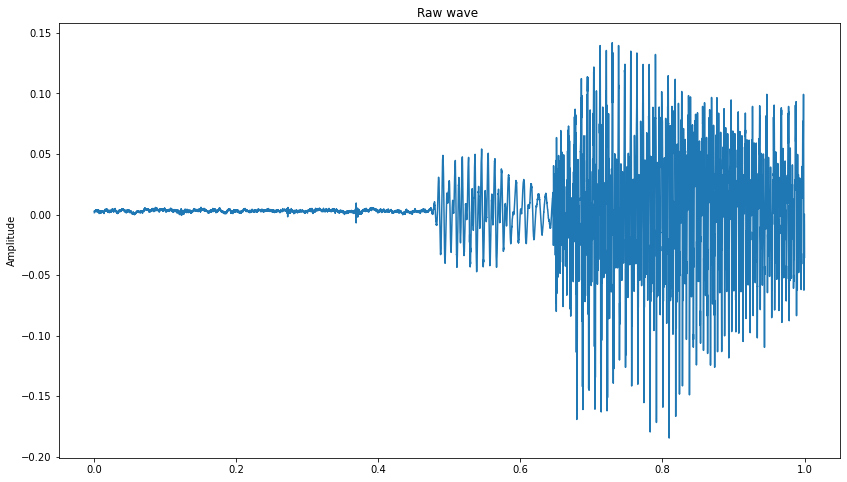

In [39]:
data = load_audio_file(filepath+'0a9f9af7_nohash_0.wav')
plot_time_series(data)


Data Augmentation

Aiming to produce new input from a single data.
Noise injecting
Shifting the sound
Changing frequency
Changing speed


Noise Injection

It simply add some random value into data by using numpy.

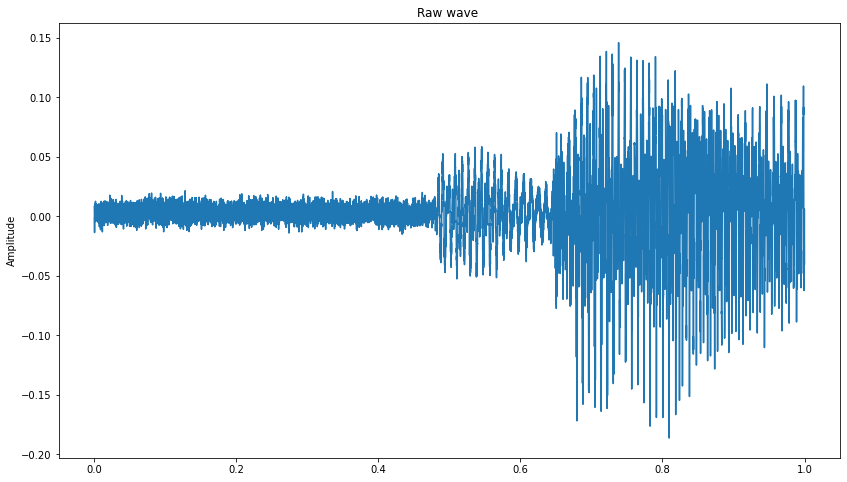

In [40]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

Shifting Time

The idea of shifting time is very simple. It just shift audio to left/right with a random second. If shifting audio to left (fast forward) with x seconds, first x seconds will mark as 0 (i.e. silence). If shifting audio to right (back forward) with x seconds, last x seconds will mark as 0 (i.e. silence).

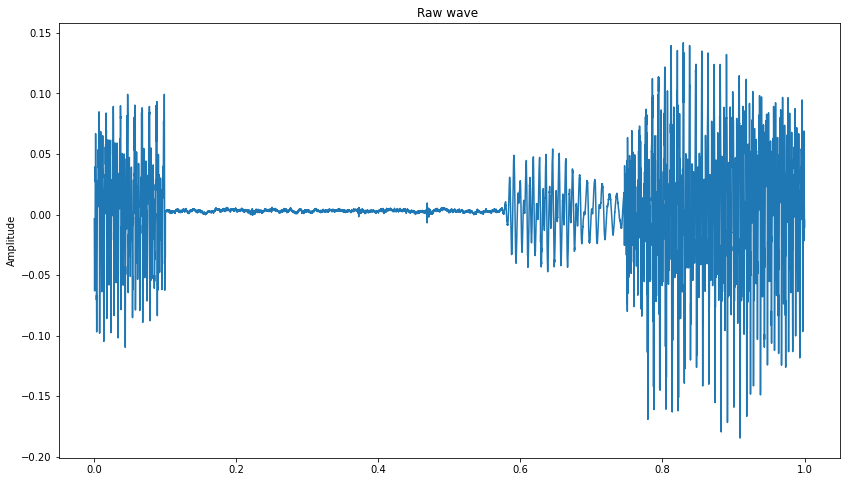

In [41]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear the word 


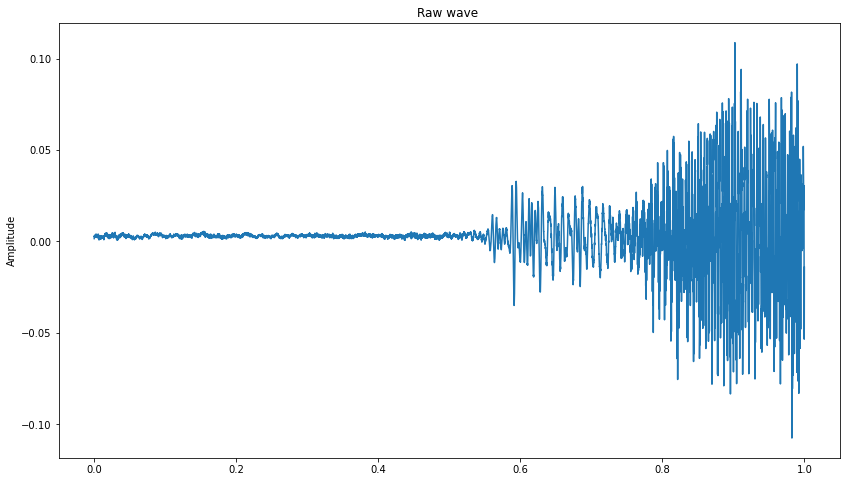

Higher frequencies  


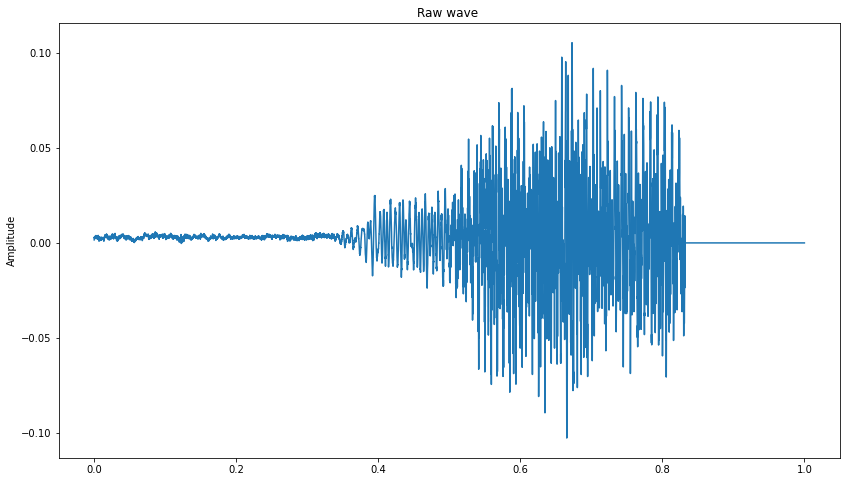

In [42]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data

#generating a deeper version
data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear the word ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

#generating a version with high frequencies
data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)